# Open-Brewery-DB Exploration

The goal of this is to scrape the brewery data avaiable for breweries in the US from the open project and database API found at [Open Brewery DB](https://www.openbrewerydb.org/).

## Scraping the Data

In [1]:
# import libraries
import requests
import json
import numpy as np
import pandas as pd

In [2]:
# pull data with while loop (extracts all database data)
data_bool = True
page = 1
while data_bool == True:
    url = f'https://api.openbrewerydb.org/v1/breweries?page={page}&per_page=200'
    response = requests.get(url)
    data = response.json()
    if len(data) == 0:
        data_bool = False
        break
    if page == 1:
        data_df = pd.DataFrame(data)
    else:
        data_df = pd.concat([data_df, pd.DataFrame(data)])
    page += 1

# reset index
data_df.reset_index(inplace = True, drop = True)

In [6]:
# before
data_df.head(10)

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,None,None,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
5,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,-121.3288021,44.0575649,5415851007,None,Oregon,1135 NW Galveston Ave Ste B
6,e432899b-7f58-455f-9c7b-9a6e2130a1e0,10 Barrel Brewing Co,large,1411 NW Flanders St,None,None,Portland,Oregon,97209-2620,United States,-122.6855056,45.5259786,5032241700,http://www.10barrel.com,Oregon,1411 NW Flanders St
7,9f1852da-c312-42da-9a31-097bac81c4c0,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,None,None,Bend,Oregon,97701,United States,-121.2809536,44.0912109,5415851007,None,Oregon,62950 NE 18th St
8,ea4f30c0-bce6-416b-8904-fab4055a7362,10 Barrel Brewing Co - Boise,large,826 W Bannock St,None,None,Boise,Idaho,83702-5857,United States,-116.202929,43.618516,2083445870,http://www.10barrel.com,Idaho,826 W Bannock St
9,1988eb86-f0a2-4674-ba04-02454efa0d31,10 Barrel Brewing Co - Denver,large,2620 Walnut St,None,None,Denver,Colorado,80205-2231,United States,-104.9853655,39.7592508,7205738992,None,Colorado,2620 Walnut St


## Cleaning the Data

In [4]:
# lambda function to make lower case, remove trailing or leading spaces
lower_strip = lambda text: text.lower().strip() if text is not None else None

In [5]:
# how much data will we be removing by sticking to just the US, and what type of cleaning is required?
data_df['country'].value_counts()

United States     7972
Ireland             70
England             62
South Korea         61
Poland              34
Portugal            14
Austria             14
Scotland            10
Sweden               6
France               3
Isle of Man          2
 United States       1
Name: country, dtype: int64

In [6]:
# clean country column and filter for "united states"
data_df['country'] = data_df['country'].apply(func=lower_strip)
data_us = data_df[data_df['country'] == 'united states']

In [7]:
data_us['country'].value_counts()

united states    7973
Name: country, dtype: int64

In [9]:
# now that we have just the US, let's see what type of null value data is remaining
data_us.isnull().sum()

id                   0
name                 0
brewery_type         0
address_1          768
address_2         7968
address_3         7973
city                 0
state_province       0
postal_code          0
country              0
longitude         2326
latitude          2326
phone              790
website_url       1132
state                0
street             768
dtype: int64

In [12]:
# is street equivalent to address_1?
data_us[data_us['address_1'] != data_us['street']]

,id,name,brewery_type,city,postal_code,country,longitude,latitude,phone,website_url,state,street


In [ ]:
# is state equivalent to state_province?
data_us[data_us['state_province'] != data_us['state']]

With this amount of data and for the purposes of our project, we could probably remove the rows which don't contain a tier-1 address.

Most tier-2 and tier-3 addresses are missing, so let's just remove those columns.

Additionally, **street** is an identical column to **address_1** as is **state** to **state_province**. We can remove the duplicate columns.

In [10]:
# drop all locations without addy 1, and remove addy 2 and addy 3 columns
data_us.dropna(subset = ['address_1'], axis = 0, inplace = True)
data_us.drop(['address_2', 'address_3'], axis = 1, inplace = True)

# remove address_1 and state_province columns (these are equivalents of street and state)
data_us.drop(['address_1', 'state_province'], axis = 1, inplace = True)

C:\Users\carlj\AppData\Local\Temp\ipykernel_20660\792256491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us.dropna(subset = ['address_1'], axis = 0, inplace = True)
C:\Users\carlj\AppData\Local\Temp\ipykernel_20660\792256491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us.drop(['address_2', 'address_3'], axis = 1, inplace = True)
C:\Users\carlj\AppData\Local\Temp\ipykernel_20660\792256491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

We should apply our cleaning function to the rest of the applicable text-based columns.

In [13]:
# clean name, brewery_type, city, state, street, and website_url columns
data_us['name'] = data_us['name'].apply(func=lower_strip)
data_us['brewery_type'] = data_us['brewery_type'].apply(func=lower_strip)
data_us['city'] = data_us['city'].apply(func=lower_strip)
data_us['state'] = data_us['state'].apply(func=lower_strip)
data_us['street'] = data_us['street'].apply(func=lower_strip)
data_us['website_url'] = data_us['website_url'].apply(func=lower_strip)

C:\Users\carlj\AppData\Local\Temp\ipykernel_20660\2023110785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us['name'] = data_us['name'].apply(func=lower_strip)
C:\Users\carlj\AppData\Local\Temp\ipykernel_20660\2023110785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us['brewery_type'] = data_us['brewery_type'].apply(func=lower_strip)
C:\Users\carlj\AppData\Local\Temp\ipykernel_20660\2023110785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [15]:
# let's check nulls again
data_us.isnull().sum()

id                 0
name               0
brewery_type       0
city               0
postal_code        0
country            0
longitude       1683
latitude        1683
phone            543
website_url      787
state              0
street             0
dtype: int64

At the very least, we have full addresses. It's very likely that longitude/latitude, phone numbers, and websites won't be relevant. We'll keep these rows for now, and consider them *copmlete* enough.

In [14]:
# after
data_us.head(10)

,id,name,brewery_type,city,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) brewing co,micro,norman,73069-8224,united states,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,oklahoma,1716 topeka st
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) brewing co,micro,austin,78745-1197,united states,None,None,5129211545,http://www.512brewing.com,texas,407 radam ln ste f200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of us brewing company,micro,mount pleasant,53406-3920,united states,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,wisconsin,8100 washington ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 barrel brewing co,large,san diego,92101-6618,united states,-117.129593,32.714813,6195782311,http://10barrel.com,california,1501 e st
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 barrel brewing co,large,bend,97701-9847,united states,-121.281706,44.08683531,5415851007,http://www.10barrel.com,oregon,62970 18th st
5,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 barrel brewing co,large,bend,97703-2465,united states,-121.3288021,44.0575649,5415851007,None,oregon,1135 nw galveston ave ste b
6,e432899b-7f58-455f-9c7b-9a6e2130a1e0,10 barrel brewing co,large,portland,97209-2620,united states,-122.6855056,45.5259786,5032241700,http://www.10barrel.com,oregon,1411 nw flanders st
7,9f1852da-c312-42da-9a31-097bac81c4c0,10 barrel brewing co - bend pub,large,bend,97701,united states,-121.2809536,44.0912109,5415851007,None,oregon,62950 ne 18th st
8,ea4f30c0-bce6-416b-8904-fab4055a7362,10 barrel brewing co - boise,large,boise,83702-5857,united states,-116.202929,43.618516,2083445870,http://www.10barrel.com,idaho,826 w bannock st
9,1988eb86-f0a2-4674-ba04-02454efa0d31,10 barrel brewing co - denver,large,denver,80205-2231,united states,-104.9853655,39.7592508,7205738992,None,colorado,2620 walnut st


## Visualizing the Data

For future exploration, use `data/open-brewery-db.csv` pulled and cleaned by `scripts/open-brewery-db-extractor.py`.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# import dataframe if returning
df = pd.read_csv('../data/open-brewery-db.csv')

In [3]:
# basic data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7205 non-null   object 
 1   name          7205 non-null   object 
 2   brewery_type  7205 non-null   object 
 3   city          7205 non-null   object 
 4   postal_code   7205 non-null   object 
 5   country       7205 non-null   object 
 6   longitude     5522 non-null   float64
 7   latitude      5522 non-null   float64
 8   phone         6662 non-null   object 
 9   website_url   6418 non-null   object 
 10  state         7205 non-null   object 
 11  street        7205 non-null   object 
dtypes: float64(2), object(10)
memory usage: 675.6+ KB


In [4]:
df.describe()

,longitude,latitude
count,5522.000000,5.522000e+03
mean,-97.773401,1.563181e+03
std,18.756119,1.131958e+05
min,-159.586522,-4.478217e+01
25%,-117.590895,3.617073e+01
50%,-93.191783,4.023997e+01
75%,-81.937273,4.318590e+01
max,-66.983481,8.411641e+06


In [8]:
b# how many states are in the data 
df.nunique()

id              7205
name            7078
brewery_type      12
city            2704
postal_code     6999
country            1
longitude       5438
latitude        5438
phone           6486
website_url     6069
state             51
street          7113
dtype: int64

In [14]:
main_color = sns.color_palette()[0]

In [18]:
brewery_type_order = df['brewery_type'].value_counts().index
brewery_type_order

Index(['micro', 'brewpub', 'regional', 'closed', 'contract', 'large',
       'proprietor', 'planning', 'nano', 'bar', 'location', 'taproom'],
      dtype='object')

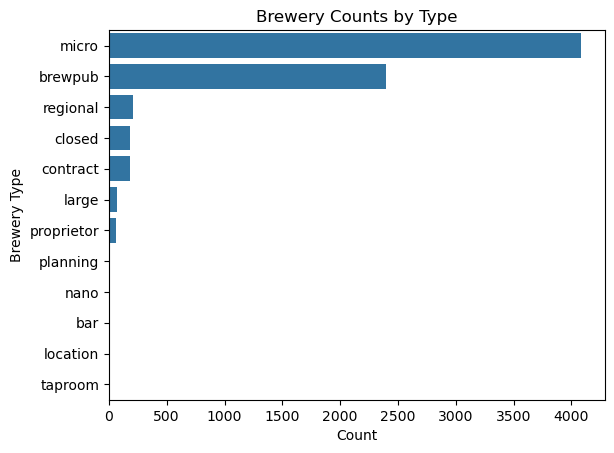

In [21]:
# brewery type
sns.countplot(data=df, y = 'brewery_type', color = main_color, order = brewery_type_order)
plt.xlabel('Count')
plt.ylabel('Brewery Type')
plt.title('Brewery Counts by Type')
plt.show()

In [28]:
# top 5 breweries
top_5_breweries = df['state'].value_counts()[:5]

# lowest 5 breweries
lowest_5_breweries = df['state'].value_counts()[-5:,]

In [29]:
top_5_breweries

california    829
washington    459
colorado      390
new york      370
michigan      353
Name: state, dtype: int64

In [30]:
lowest_5_breweries

delaware                26
north dakota            26
hawaii                  23
mississippi             15
district of columbia    14
Name: state, dtype: int64

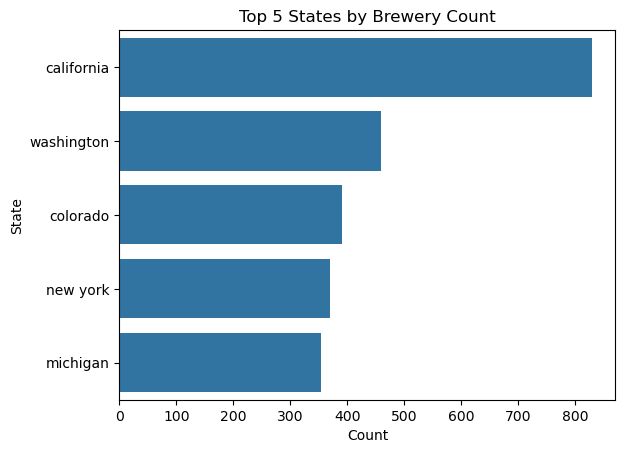

In [31]:
sns.countplot(data=df, y = 'state', color = main_color, order = top_5_breweries.index)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Top 5 States by Brewery Count')
plt.show()

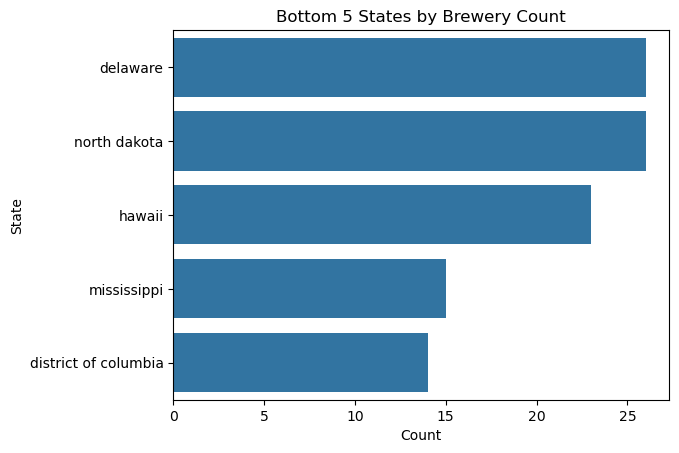

In [32]:
sns.countplot(data=df, y = 'state', color = main_color, order = lowest_5_breweries.index)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Bottom 5 States by Brewery Count')
plt.show()

In [46]:
us_state_to_abbrev = {
    "alabama": "AL",
    "alaska": "AK",
    "arizona": "AZ",
    "arkansas": "AR",
    "california": "CA",
    "colorado": "CO",
    "connecticut": "CT",
    "delaware": "DE",
    "florida": "FL",
    "georgia": "GA",
    "hawaii": "HI",
    "idaho": "ID",
    "illinois": "IL",
    "indiana": "IN",
    "iowa": "IA",
    "kansas": "KS",
    "kentucky": "KY",
    "louisiana": "LA",
    "maine": "ME",
    "maryland": "MD",
    "massachusetts": "MA",
    "michigan": "MI",
    "minnesota": "MN",
    "mississippi": "MS",
    "missouri": "MO",
    "montana": "MT",
    "nebraska": "NE",
    "nevada": "NV",
    "new hampshire": "NH",
    "new jersey": "NJ",
    "new mexico": "NM",
    "new york": "NY",
    "north carolina": "NC",
    "north dakota": "ND",
    "ohio": "OH",
    "oklahoma": "OK",
    "oregon": "OR",
    "pennsylvania": "PA",
    "rhode island": "RI",
    "south carolina": "SC",
    "south dakota": "SD",
    "tennessee": "TN",
    "texas": "TX",
    "utah": "UT",
    "vermont": "VT",
    "virginia": "VA",
    "washington": "WA",
    "west virginia": "WV",
    "wisconsin": "WI",
    "wyoming": "WY",
    "district of columbia": "DC",
}

In [48]:
# breweries by state
breweries_by_state = pd.DataFrame(df['state'].value_counts()).reset_index()
breweries_by_state.columns = ['State', 'Count']
breweries_by_state['State'] = breweries_by_state['State'].apply(lambda state: us_state_to_abbrev[state])

In [49]:
breweries_by_state.head()

,State,Count
0,CA,829
1,WA,459
2,CO,390
3,NY,370
4,MI,353


In [53]:
# geographical representations
fig = px.choropleth(breweries_by_state,
                    locationmode = 'USA-states',
                    locations = 'State',
                    scope = 'usa',
                    color = 'Count',
                    color_continuous_scale = 'Viridis_r',
                    title = 'Breweries by State')
fig.show()

In [54]:
# save this exact dataframe so we can create an interactive map within the quarto website
breweries_by_state.to_csv('../data/brewery-count-by-state.csv', index = False)